In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nrutils
from nrutils.core.nrsc import *
from nrutils import scsearch,gwylm, simdir2scentry
from nrutils.core import basics

(positive)>> Applying custom matplotlib settings.


In [6]:
AA = scsearch(institute='bam',keyword='q2_a10_a27_ph',verbose=True)

(scsearch)>> Found institute (=bam) keyword.
(scsearch)>> Found keyword (=q2_a10_a27_ph) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 7 possibly degenerate simulations:
[0001][hogshead] chinmay_precessingRuns: 1chi0.70-p-q2.00	(q2_a10_a27_ph180_th90)
[0002][hogshead] chinmay_precessingRuns: 1chi0.70-p-q2.00	(q2_a10_a27_ph90_th90)
[0003][hogshead] chinmay_precessingRuns: 1chi0.70-p-q2.00	(q2_a10_a27_ph0_th90)
[0004][hogshead] chinmay_precessingRuns: 1chi0.70-p-q2.00	(q2_a10_a27_ph0_th90)
[0005][hogshead] chinmay_precessingRuns: 1chi0.70-p-q2.00	(q2_a10_a27_ph270_th90)
[0006][hogshead] chinmay_precessingRuns: 1chi0.70-p-q2.00	(q2_a10_a27_ph180_th90)
[0007][hogshead] chinmay_precessingRuns: 1chi0.70-p-q2.00	(q2_a10_a27_ph90_th90)



In [7]:
ylm27_0=gwylm(AA[3], lmax=2, verbose=False, clean=True, dt=0.5,pad=2000)
ylm27_90=gwylm(AA[6], lmax=2, verbose=False, clean=True, dt=0.5,pad=2000)
ylm27_180=gwylm(AA[0], lmax=2, verbose=False, clean=True, dt=0.5,pad=2000)
ylm27_270=gwylm(AA[4], lmax=2, verbose=False, clean=True, dt=0.5,pad=2000)

In [8]:
ylm27_0_co = ylm27_0.__calc_coprecessing_frame__(transform_domain='td')
ylm27_90_co = ylm27_90.__calc_coprecessing_frame__(transform_domain='td')
ylm27_180_co = ylm27_180.__calc_coprecessing_frame__(transform_domain='td')
ylm27_270_co = ylm27_270.__calc_coprecessing_frame__(transform_domain='td')

len(domain_vals) =  11258
index_ref =  1
Z_ref =  0.0
ref_orientation =  [0.66716107 0.         0.56903014]
len(domain_vals) =  11258
index_ref =  5680
Z_ref =  -0.399797616091263
ref_orientation =  [0.66716107 0.         0.56903014]
(calc_coprecessing_angles!)>> Reference orientation and calculated data inconsistent. We will reflect.
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant quantities.
len(domain_vals) =  11096
index_ref =  1
Z_ref =  0.0
ref_orientation =  [0.66716107 0.         0.56903014]
len(domain_vals) =  11096
index_ref =  5598
Z_ref =  0.6818302679842929
ref_orientation =  [0.66716107 0.         0.56903014]
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant qua

### The issue is that, in the inertial frame the asymmetry in the strain obtained from h22 & h2-2 and from psi4(2,2) & psi4(2,-2) in the frequency domain, agree with each other; but these same things in the coprecessing frame do not agree. These quantities however do agree with each other when the rotation to coprecessing frame is done using Mark's old QuadrupoleAxes script in Mathematica. This seems to be an anomaly that only shows up in nrutils, also only for the asymmetry. The same operations with the symmetric waveform does not lead to this anomaly.

/Users/shrobanaghosh/miniconda3/envs/test/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in divide
  
/Users/shrobanaghosh/miniconda3/envs/test/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  
/Users/shrobanaghosh/miniconda3/envs/test/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in divide
/Users/shrobanaghosh/miniconda3/envs/test/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract


Text(0.5,1,'inertial')

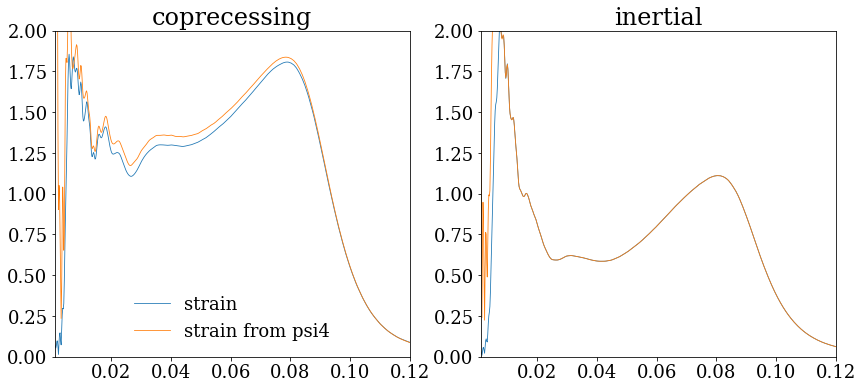

In [13]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)

# asymmetry in coprecessing frame calculated from strain directly
plt.plot(ylm27_0_co.f[1:],0.5*np.abs(ylm27_0_co[2,2]['strain'].fd_y[1:] - \
                                   np.conj(np.flip(ylm27_0_co[2,-2]['strain'].fd_y)[:-1])),label="strain")

# asymmetry in coprecessing frame calculated from psi4, by dividing them by 2 pi f^2
plt.plot(ylm27_0_co.f[1:],0.5*np.abs(ylm27_0_co[2,2]['psi4'].fd_y[1:]/((2*np.pi*ylm27_0_co.f[1:])**2)- \
                                   np.conj(np.flip(ylm27_0_co[2,-2]['psi4'].fd_y)[:-1])/((2*np.pi*ylm27_0_co.f[1:])**2)),label="strain from psi4")
# plt.plot(ylm27.f[1:],0.5*np.abs(ylm27[2,2]['strain'].fd_y[1:] - np.conj(np.flip(ylm27[2,-2]['strain'].fd_y)[:-1])),'k',label="inertial frame strain")
plt.xlim(0.001,0.12)
plt.ylim(0.0,2)
plt.legend()
plt.title("coprecessing")

plt.subplot(1,2,2)

# asymmetry in inertial frame calculated directly from strain
plt.plot(ylm27_0.f[1:],0.5*np.abs(ylm27_0[2,2]['strain'].fd_y[1:] - np.conj(np.flip(ylm27_0[2,-2]['strain'].fd_y)[:-1])))

# asymmetry in inertial frame calculated from psi4, by dividing them by 2 pi f^2
plt.plot(ylm27_0.f[1:],0.5*np.abs(ylm27_0[2,2]['psi4'].fd_y[1:]/((2*np.pi*ylm27_0.f[1:])**2) - np.conj(np.flip(ylm27_0[2,-2]['psi4'].fd_y)[:-1])/((2*np.pi*ylm27_0.f[1:])**2)))
plt.xlim(0.001,0.12)
plt.ylim(0.0,2)
plt.title("inertial")